In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split


## importation des documents

In [3]:
filename='C:/Users/alaed/Downloads/emines/option/projet/train.csv'
df=pd.read_csv(filename)
df_original=df.copy()
filename='C:/Users/alaed/Downloads/emines/option/projet/test.csv'
vdf=pd.read_csv(filename)
print(df.shape)
print(vdf.shape)


(1460, 81)
(1459, 80)


## fonctions utilisé

In [4]:
# metric de scoring
def log_rmse(yhat, ytrue):
    return np.sqrt(mean_squared_error ( np.log(yhat), np.log(ytrue) ))

## exploration des données

In [5]:
# columns types
int_columns = [col for col in df.columns if df[col].dtype == 'int64']
# enlever SaleType et id
int_columns = int_columns[1:]
int_columns = int_columns[:-1]

# variables float
flt_columns = [col for col in df.columns if df[col].dtype == 'float64']
# variables categorielles
cat_columns = [col for col in df.columns if df[col].dtype == 'O']
print('nombre de int colonnes est   {}'.format(len(int_columns)))
print('nombre de float colonnes  est   {}'.format(len(flt_columns)))
print('nombre de catégoriques colonnes est  {}'.format(len(cat_columns)))


nombre de int colonnes est   33
nombre de float colonnes  est   3
nombre de catégoriques colonnes est  43


In [6]:
# remplacer toutes les valeurs manquantes par 0
for col in int_columns:
    df[col].fillna(0, inplace = True)
    vdf[col].fillna(0, inplace = True)

## premier modèle : que les colonnes int

In [7]:
#split train et test
x=df[int_columns]
y=df.SalePrice

x.sample(frac = 1)
y.sample(frac=1)

x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=2)
print(x_train.shape)

(1022, 33)


In [8]:
# train regressor

clf = RandomForestRegressor(max_depth = 5,n_estimators=300 )

clf.fit(x_train, y_train)
print(clf)
yhat_test = clf.predict(x_test)
yhat_train = clf.predict(x_train)

print("\n -- RMSE test {:.4f}".format(log_rmse(y_test, yhat_test)  ))
print("\n -- RMSE train {:.4f}".format(log_rmse(y_train, yhat_train)))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

 -- RMSE test 0.1826

 -- RMSE train 0.1419


In [9]:
# a ce niveau appliquer les memes tranformations sur X_valid
X_valid = vdf[int_columns]
y_valid = clf.predict(X_valid)

## construction et exportation du dataframe de resultats

In [10]:
results = pd.DataFrame(columns = ['Id', 'SalePrice'])

# Kaggle veut que la colonne index commence par 1461
results['Id'] = X_valid.index + 1461

results['SalePrice'] = y_valid

# ecrire le resultats dans le fichier csv
results.to_csv("submission_01.csv", index = False)

In [11]:
#ceci m'a donné 0.17878 comme score

## exploratrion des données

In [12]:
cols_with_nan=[]
# j'ai besoin de voir les nan dans les deux datasets
adf = pd.concat([df,vdf])

for col in adf[cat_columns].columns:
    print("{} {} values {} Nan".format(col,len(adf[col].unique()),adf[adf[col].isnull()].shape[0]))
    if adf[adf[col].isnull()].shape[0]>0:
        cols_with_nan.append(col)
cols_with_nan

C:\Users\alaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


MSZoning 6 values 4 Nan
Street 2 values 0 Nan
Alley 3 values 2721 Nan
LotShape 4 values 0 Nan
LandContour 4 values 0 Nan
Utilities 3 values 2 Nan
LotConfig 5 values 0 Nan
LandSlope 3 values 0 Nan
Neighborhood 25 values 0 Nan
Condition1 9 values 0 Nan
Condition2 8 values 0 Nan
BldgType 5 values 0 Nan
HouseStyle 8 values 0 Nan
RoofStyle 6 values 0 Nan
RoofMatl 8 values 0 Nan
Exterior1st 16 values 1 Nan
Exterior2nd 17 values 1 Nan
MasVnrType 5 values 24 Nan
ExterQual 4 values 0 Nan
ExterCond 5 values 0 Nan
Foundation 6 values 0 Nan
BsmtQual 5 values 81 Nan
BsmtCond 5 values 82 Nan
BsmtExposure 5 values 82 Nan
BsmtFinType1 7 values 79 Nan
BsmtFinType2 7 values 80 Nan
Heating 6 values 0 Nan
HeatingQC 5 values 0 Nan
CentralAir 2 values 0 Nan
Electrical 6 values 1 Nan
KitchenQual 5 values 1 Nan
Functional 8 values 2 Nan
FireplaceQu 6 values 1420 Nan
GarageType 7 values 157 Nan
GarageFinish 4 values 159 Nan
GarageQual 6 values 159 Nan
GarageCond 6 values 159 Nan
PavedDrive 3 values 0 Nan
PoolQ

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [13]:
#divisier les nan catégoriques colonnes en deux parties:
    #ceux qui continnent NA comme vraiment une valeur
    #ceuxi qui sont vraiment NAN
nan_cat_columns=['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence','MiscFeature']
special_cat_col=['Utilities','MSZoning','Exterior1st','Exterior2nd','Electrical','KitchenQual','Functional','SaleType']
# remplacer nan par other dans les variables catégoriques
for col in nan_cat_columns:
    df[col].fillna('Other', inplace = True)
    vdf[col].fillna('Other', inplace = True)

In [14]:
cols_with_nan=[]
adf = pd.concat([df,vdf])
for col in adf[flt_columns].columns:
    print("{} {} values {} Nan".format(col,len(adf[col].unique()),adf[adf[col].isnull()].shape[0]))
    if adf[adf[col].isnull()].shape[0]>0:
        cols_with_nan.append(col)
cols_with_nan

LotFrontage 129 values 486 Nan
MasVnrArea 445 values 23 Nan
GarageYrBlt 104 values 159 Nan


C:\Users\alaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [15]:
#après voir la description , je pense qu' si je remplace par 0 , ca va pas affecter négativement le modèle
nan_flt_columns=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
# remplacer toutes les valeurs manquantes par 0
for col in nan_flt_columns:
    df[col].fillna(0, inplace = True)
    vdf[col].fillna(0, inplace = True)

# tester des modèles

In [25]:
# avant de passer au correlation , j' ei pensé à tester da'utres modèeles avec ces modofication que j'avais fait
# et puis, je pourrais améliorer le modèele par ajouter les varaibles spéciapaux qui ont encore du nan après faire 
#un traitement sur eux, et tester la moyenne à la palce de 0 que j'avait remplacé les int et float nan 
#et supprimer les variables qui sont corrrélés

In [16]:
 #pour cela il faudra d'abor encoder les variables catégoriques
c_columns = [col for col in cat_columns if col not in special_cat_col]
adf = pd.concat([df,vdf])
for col in c_columns:
    le = LabelEncoder()
    le.fit(adf[col])
    df[col]  = le.transform(df[col])
    vdf[col] = le.transform(vdf[col])

C:\Users\alaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


# randomforest

In [17]:
X = df[c_columns + flt_columns + int_columns]
# prendre le log pour de skewer la variable a predire
y = np.log( df['SalePrice'] +1  )

In [230]:
clf = RandomForestRegressor(n_estimators=1000)
param_grid = {"max_depth": [3,6, 9, 12],
              "min_samples_split": [2, 3, 5]}

# run grid search
gs = GridSearchCV(clf, param_grid=param_grid, cv=3, verbose = 2)
gs.fit(X,y)

print(np.sqrt(gs.best_score_))
print(gs.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=3, min_samples_split=2 ................................
[CV] ................. max_depth=3, min_samples_split=2, total=   3.9s
[CV] max_depth=3, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ................. max_depth=3, min_samples_split=2, total=   4.2s
[CV] max_depth=3, min_samples_split=2 ................................
[CV] ................. max_depth=3, min_samples_split=2, total=   3.8s
[CV] max_depth=3, min_samples_split=3 ................................
[CV] ................. max_depth=3, min_samples_split=3, total=   4.0s
[CV] max_depth=3, min_samples_split=3 ................................
[CV] ................. max_depth=3, min_samples_split=3, total=   3.8s
[CV] max_depth=3, min_samples_split=3 ................................
[CV] ................. max_depth=3, min_samples_split=3, total=   3.7s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] ................. max_depth=3, min_samples_split=5, total=   4.0s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] ................. max_depth=3, min_samples_split=5, total=   4.0s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  5.4min finished


0.9302219947729017
{'max_depth': 12, 'min_samples_split': 3}


In [231]:
# juste pour verfier que l'on n'overfit pas
# sur un split test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
yhat_train = gs.best_estimator_.predict(X_train)
yhat_test = gs.best_estimator_.predict(X_test)
train_score = np.sqrt(mean_squared_error(yhat_train, y_train))
test_score = np.sqrt(mean_squared_error(yhat_test, y_test))
print("test {:.4f} train {:.4f} ".format(test_score, train_score))


test 0.0594 train 0.0554 


In [235]:
# kaggle submission
# -----------------------------------------------------
X_valid = vdf[c_columns + flt_columns + int_columns]
yhat_valid = gs.best_estimator_.predict(X_valid)
yhat_valid = np.exp(yhat_valid) -1

results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] = yhat_valid
results.to_csv("submission_04.csv", index = False)

In [236]:
#le score maintenant est passé à 0.14478

# gradient boosting

In [241]:
model_gb = GradientBoostingRegressor(n_estimators=1000)
param_grid = {"max_depth": [3,6, 9, 12],
              "min_samples_split": [2, 3, 5,10],
             "learning_rate": [0.01, 0.05, 0.1, 0.2]}
# "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.5, 0.2]
#"max_features":["log2","sqrt"]
# run grid search
gs = GridSearchCV(model_gb, param_grid=param_grid, cv=5, verbose = 2)
gs.fit(X,y)

print(np.sqrt(gs.best_score_))
print(gs.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] learning_rate=0.01, max_depth=3, min_samples_split=2 ............
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=2, total=   3.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=3, min_samples_split=2, total=   3.0s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=2 ............
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=2, total=   3.5s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=2 ............
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=2, total=   3.5s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=2 ............
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=2, total=   3.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=3 ............
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=3, total=   3.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=3 ............
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=3, total=   3.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=3 ............
[CV]  learning_rate=0.01, max_depth=3, min_samples_split=3, total=   2.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_split=

[CV]  learning_rate=0.01, max_depth=9, min_samples_split=10, total=  16.7s
[CV] learning_rate=0.01, max_depth=9, min_samples_split=10 ...........
[CV]  learning_rate=0.01, max_depth=9, min_samples_split=10, total=  15.8s
[CV] learning_rate=0.01, max_depth=12, min_samples_split=2 ...........
[CV]  learning_rate=0.01, max_depth=12, min_samples_split=2, total=  25.4s
[CV] learning_rate=0.01, max_depth=12, min_samples_split=2 ...........
[CV]  learning_rate=0.01, max_depth=12, min_samples_split=2, total=  25.8s
[CV] learning_rate=0.01, max_depth=12, min_samples_split=2 ...........
[CV]  learning_rate=0.01, max_depth=12, min_samples_split=2, total=  29.2s
[CV] learning_rate=0.01, max_depth=12, min_samples_split=2 ...........
[CV]  learning_rate=0.01, max_depth=12, min_samples_split=2, total=  27.6s
[CV] learning_rate=0.01, max_depth=12, min_samples_split=2 ...........
[CV]  learning_rate=0.01, max_depth=12, min_samples_split=2, total=  26.4s
[CV] learning_rate=0.01, max_depth=12, min_sample

[CV]  learning_rate=0.05, max_depth=6, min_samples_split=10, total=   6.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=10 ...........
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=10, total=   6.5s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=10 ...........
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=10, total=   8.0s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=10 ...........
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=10, total=   7.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_split=10 ...........
[CV]  learning_rate=0.05, max_depth=6, min_samples_split=10, total=   6.5s
[CV] learning_rate=0.05, max_depth=9, min_samples_split=2 ............
[CV]  learning_rate=0.05, max_depth=9, min_samples_split=2, total=   6.0s
[CV] learning_rate=0.05, max_depth=9, min_samples_split=2 ............
[CV]  learning_rate=0.05, max_depth=9, min_samples_split=2, total=   6.9s
[CV] learning_rate=0.05, max_depth=9, min_samples_s

[CV]  learning_rate=0.1, max_depth=3, min_samples_split=5, total=   3.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=5 .............
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=5, total=   3.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=5 .............
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=5, total=   2.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10 ............
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=10, total=   2.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10 ............
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=10, total=   3.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10 ............
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=10, total=   3.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10 ............
[CV]  learning_rate=0.1, max_depth=3, min_samples_split=10, total=   2.6s
[CV] learning_rate=0.1, max_depth=3, min_samples_split=10 .

[CV]  learning_rate=0.1, max_depth=12, min_samples_split=3, total=   2.2s
[CV] learning_rate=0.1, max_depth=12, min_samples_split=5 ............
[CV]  learning_rate=0.1, max_depth=12, min_samples_split=5, total=   2.0s
[CV] learning_rate=0.1, max_depth=12, min_samples_split=5 ............
[CV]  learning_rate=0.1, max_depth=12, min_samples_split=5, total=   2.0s
[CV] learning_rate=0.1, max_depth=12, min_samples_split=5 ............
[CV]  learning_rate=0.1, max_depth=12, min_samples_split=5, total=   2.0s
[CV] learning_rate=0.1, max_depth=12, min_samples_split=5 ............
[CV]  learning_rate=0.1, max_depth=12, min_samples_split=5, total=   2.0s
[CV] learning_rate=0.1, max_depth=12, min_samples_split=5 ............
[CV]  learning_rate=0.1, max_depth=12, min_samples_split=5, total=   2.0s
[CV] learning_rate=0.1, max_depth=12, min_samples_split=10 ...........
[CV]  learning_rate=0.1, max_depth=12, min_samples_split=10, total=   2.5s
[CV] learning_rate=0.1, max_depth=12, min_samples_split

[CV]  learning_rate=0.2, max_depth=9, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.2, max_depth=9, min_samples_split=3 .............
[CV]  learning_rate=0.2, max_depth=9, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.2, max_depth=9, min_samples_split=3 .............
[CV]  learning_rate=0.2, max_depth=9, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.2, max_depth=9, min_samples_split=3 .............
[CV]  learning_rate=0.2, max_depth=9, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.2, max_depth=9, min_samples_split=5 .............
[CV]  learning_rate=0.2, max_depth=9, min_samples_split=5, total=   1.4s
[CV] learning_rate=0.2, max_depth=9, min_samples_split=5 .............
[CV]  learning_rate=0.2, max_depth=9, min_samples_split=5, total=   1.5s
[CV] learning_rate=0.2, max_depth=9, min_samples_split=5 .............
[CV]  learning_rate=0.2, max_depth=9, min_samples_split=5, total=   1.3s
[CV] learning_rate=0.2, max_depth=9, min_samples_split=5 ......

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 33.5min finished


0.9476585953502565
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2}


In [243]:
# juste pour verfier que l'on n'overfit pas
# sur un split test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
yhat_train = gs.best_estimator_.predict(X_train)
yhat_test = gs.best_estimator_.predict(X_test)
train_score = np.sqrt(mean_squared_error(yhat_train, y_train))
test_score = np.sqrt(mean_squared_error(yhat_test, y_test))
print("test {:.4f} train {:.4f} ".format(test_score, train_score))


test 0.0231 train 0.0220 


In [244]:
# kaggle submission
# -----------------------------------------------------
X_valid = vdf[c_columns + flt_columns + int_columns]
yhat_valid = gs.best_estimator_.predict(X_valid)
yhat_valid = np.exp(yhat_valid) -1

results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['SalePrice'] = yhat_valid
results.to_csv("submission_05.csv", index = False)

In [ ]:
#le score maintenant est passé à ****

# dealing with special variables

In [18]:
# All columns where missing values can be replaced with the mode (most frequently occurring value)
adf = pd.concat([df,vdf])
for col in special_cat_col:
    df[col] = df[col].fillna(adf[col].mode()[0])
    vdf[col] = vdf[col].fillna(adf[col].mode()[0])
for col in special_cat_col:
    le = LabelEncoder()
    le.fit(adf[col])
    df[col]  = le.transform(df[col])
    vdf[col] = le.transform(vdf[col])

C:\Users\alaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


TypeError: '<' not supported between instances of 'str' and 'float'

## correlation

variables numériques

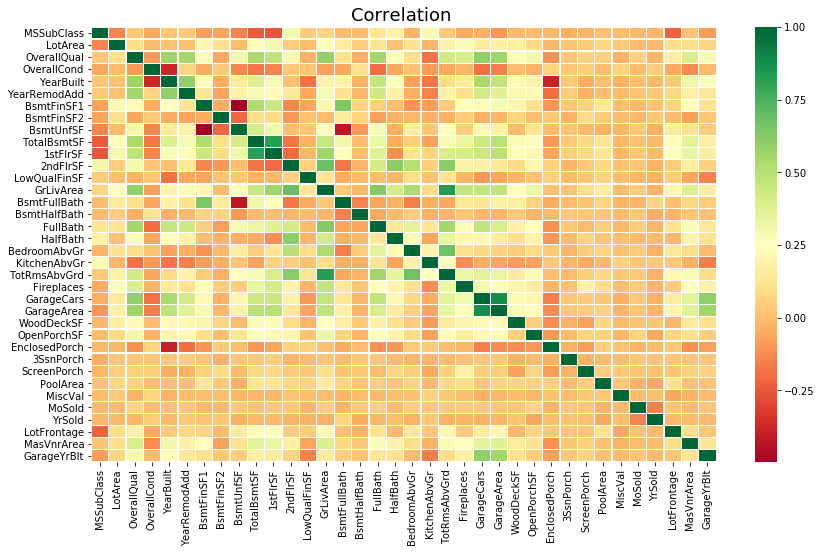

In [19]:
corr = df[int_columns+flt_columns].corr()
plt.figure(figsize=(14, 8))
plt.title('Correlation ', fontsize=18)
sns.heatmap(corr, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

In [29]:
corr = df[int_columns+flt_columns].corr()
for col in corr:
    correlations = corr[col].sort_values(ascending=False)
    print(correlations.head())

MSSubClass      1.000000
2ndFlrSF        0.307886
KitchenAbvGr    0.281721
HalfBath        0.177354
FullBath        0.131608
Name: MSSubClass, dtype: float64
LotArea        1.000000
1stFlrSF       0.299475
Fireplaces     0.271364
GrLivArea      0.263116
TotalBsmtSF    0.260833
Name: LotArea, dtype: float64
OverallQual    1.000000
GarageCars     0.600671
GrLivArea      0.593007
YearBuilt      0.572323
GarageArea     0.562022
Name: OverallQual, dtype: float64
OverallCond      1.000000
BsmtHalfBath     0.117821
YearRemodAdd     0.073741
EnclosedPorch    0.070356
MiscVal          0.068777
Name: OverallCond, dtype: float64
YearBuilt       1.000000
YearRemodAdd    0.592855
OverallQual     0.572323
GarageCars      0.537850
GarageArea      0.478954
Name: YearBuilt, dtype: float64
YearRemodAdd    1.000000
YearBuilt       0.592855
OverallQual     0.550684
FullBath        0.439046
GarageCars      0.420622
Name: YearRemodAdd, dtype: float64
BsmtFinSF1      1.000000
BsmtFullBath    0.649212
TotalBs

In [20]:
#elimination des variables qui ont plus de 0.80 correlations

In [31]:
#1stFlrSF       0.819530
#TotalBsmtSF

#TotRmsAbvGrd    0.825489
#GrLivArea 

#GarageArea     0.882475
#GarageCars     

In [21]:
corr=df.corr()
print(corr[['1stFlrSF','TotalBsmtSF']][-1:])
print(corr[['TotRmsAbvGrd','GrLivArea']][-1:])
print(corr[['GarageArea','GarageCars']][-1:])

           1stFlrSF  TotalBsmtSF
SalePrice  0.605852     0.613581
           TotRmsAbvGrd  GrLivArea
SalePrice      0.533723   0.708624
           GarageArea  GarageCars
SalePrice    0.623431    0.640409


In [22]:
corr_col=['1stFlrSF','TotRmsAbvGrd','GarageArea']
int_columns = [col for col in int_columns if col not in corr_col]
len(int_columns)

30

variables catégoriques

In [34]:
#visualisation
#boxplot de toutes les variables avec saleprice and jhonson(sale price)
#choisir : si relation linéaire >> lable ENcoder
# si relaiotn non linéaire >> llabel hot encoder ou bien transfomer la variable a une autre

C:\Users\alaed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\alaed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\alaed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


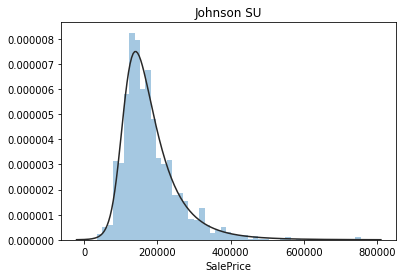

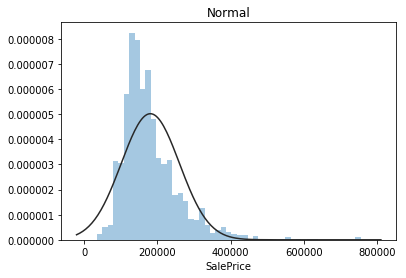

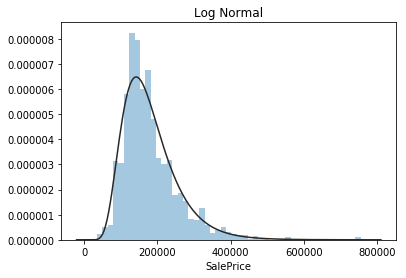

In [23]:
import scipy.stats as st
y = df['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [36]:
#il paprâit que Jhonson marche mieux que le log normal

In [24]:
#applique jhonson transformaiton sur SalePrice

y = df['SalePrice'].values
def johnson(y):
    gamma, eta, epsilon, lbda = stats.johnsonsu.fit(y)
    yt = gamma + eta*np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y-gamma)/eta) + epsilon

yt, g, et, ep, l = johnson(y)
yt2 = johnson_inverse(yt, g, et, ep, l)


# modèle : xgboost

In [76]:
# Instantiating XGBRegressor
X = df[c_columns + flt_columns + int_columns]
# prendre le log pour de skewer la variable a predire
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2,n_estimators=1000)
param_grid = {"max_depth": [3,6, 9, 12],
             "learning_rate": [0.01,0.05, 0.1,0.2]}

# "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.5, 0.2]
#"max_features":["log2","sqrt"]
gs = GridSearchCV(model_xgb, param_grid=param_grid, cv=5, verbose = 2)
gs.fit(X,yt)

print(np.sqrt(gs.best_score_))
print(gs.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] learning_rate=0.01, max_depth=3 .................................
[CV] .................. learning_rate=0.01, max_depth=3, total=   1.9s
[CV] learning_rate=0.01, max_depth=3 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .................. learning_rate=0.01, max_depth=3, total=   1.8s
[CV] learning_rate=0.01, max_depth=3 .................................
[CV] .................. learning_rate=0.01, max_depth=3, total=   1.6s
[CV] learning_rate=0.01, max_depth=3 .................................
[CV] .................. learning_rate=0.01, max_depth=3, total=   1.8s
[CV] learning_rate=0.01, max_depth=3 .................................
[CV] .................. learning_rate=0.01, max_depth=3, total=   1.8s
[CV] learning_rate=0.01, max_depth=6 .................................
[CV] .................. learning_rate=0.01, max_depth=6, total=   3.3s
[CV] learning_rate=0.01, max_depth=6 .................................
[CV] .................. learning_rate=0.01, max_depth=6, total=   3.5s
[CV] learning_rate=0.01, max_depth=6 .................................
[CV] .................. learning_rate=0.01, max_depth=6, total=   3.0s
[CV] learning_rate=0.01, max_depth=6 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


0.9577367759534301
{'learning_rate': 0.05, 'max_depth': 3}


In [80]:
# juste pour verfier que l'on n'overfit pas
# sur un split test train
X_train, X_test, y_train, y_test = train_test_split(X, yt, test_size=0.3, random_state=2)
yhat_train = gs.best_estimator_.predict(X_train)
yhat_test = gs.best_estimator_.predict(X_test)
train_score = np.sqrt(mean_squared_error(yhat_train, y_train))
test_score = np.sqrt(mean_squared_error(yhat_test, y_test))
print("test {:.4f} train {:.4f} ".format(test_score, train_score))


test 0.1250 train 0.1248 


In [83]:
# kaggle submission
# -----------------------------------------------------
X_valid = vdf[c_columns + flt_columns + int_columns]
yhat_2 = gs.best_estimator_.predict(X_valid)

yhat_valid = johnson_inverse(yhat_2, g, et, ep, l)

results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] = yhat_valid
results.to_csv("submission_07.csv", index = False)

In [52]:
#le score maintenant est passé à 0.12367

variable catégoriqe

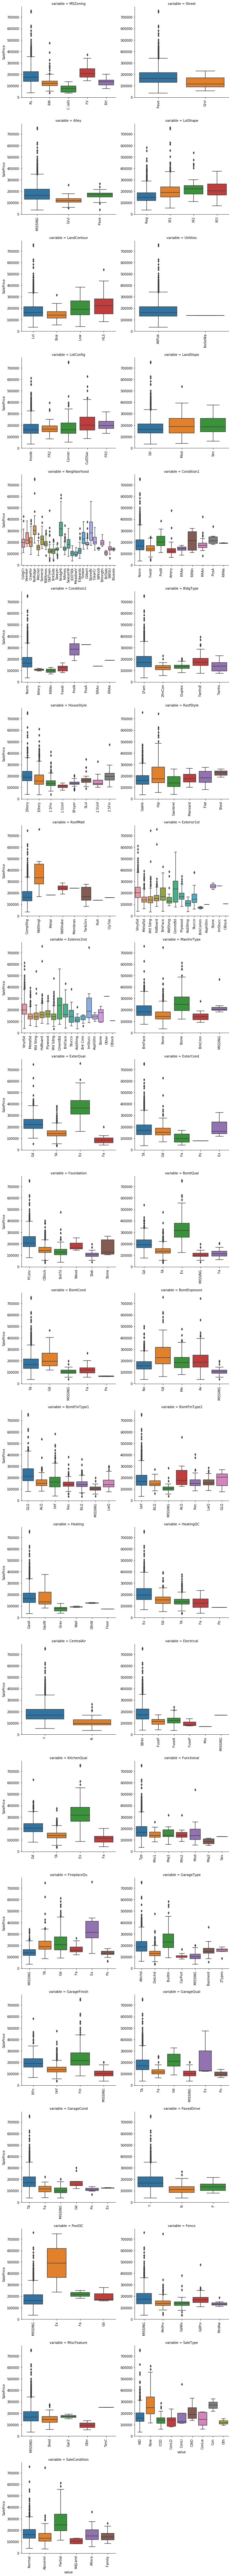

In [25]:
train=df_original.copy()
for c in cat_columns:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=cat_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [26]:
# à partir de ce boxplot ,je pourrais maintenant choisir  quelle variable
#à transformer avec one hot encoding ou bien labelencoding
label_columns=['Street','LotShape','Utilities','Heating','CentralAir']

one_hot_columns=[col for col in cat_columns if col not in label_columns]
label_columns=[col for col in label_columns if col not in special_cat_col]
label_columns

['Street', 'LotShape', 'Heating', 'CentralAir']

In [39]:
# again
filename='C:/Users/alaed/Downloads/emines/option/projet/train.csv'
df=pd.read_csv(filename)
df_original=df.copy()
filename='C:/Users/alaed/Downloads/emines/option/projet/test.csv'
vdf=pd.read_csv(filename)
vdf_original=vdf.copy()

In [40]:
for col in int_columns: 
    df[col].fillna(0, inplace = True) 
    vdf[col].fillna(0, inplace = True)

int_columns = [col for col in int_columns if col not in corr_col]

for col in nan_cat_columns: 
    df[col].fillna('Other', inplace = True) 
    vdf[col].fillna('Other', inplace = True)

for col in nan_flt_columns: 
    df[col].fillna(adf[col].mean(), inplace = True) 
    vdf[col].fillna(adf[col].mean(), inplace = True)

for col in special_cat_col: 
    df[col] = df[col].fillna(adf[col].mode()[0]) 
    vdf[col] = vdf[col].fillna(adf[col].mode()[0])

adf = pd.concat([df,vdf])
for col in special_cat_col: 
    le = LabelEncoder() 
    le.fit(adf[col]) 
    df[col] = le.transform(df[col]) 
    vdf[col] = le.transform(vdf[col])

for col in label_columns: 
    le = LabelEncoder() 
    le.fit(adf[col]) 
    df[col] = le.transform(df[col]) 
    vdf[col] = le.transform(vdf[col])

C:\Users\alaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



In [66]:
adf = pd.concat([df,vdf])
dummies=pd.get_dummies(adf[one_hot_columns])
dummies_train=dummies[:1460]
dummies_test=dummies[1460:]
dummies_train.shape


C:\Users\alaed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(1460, 197)

In [67]:
df_dummies=pd.concat([df[int_columns+flt_columns+label_columns],dummies_train],axis=1)

vdf_dummies=pd.concat([vdf[int_columns+flt_columns+label_columns],dummies_test],axis=1)

xgboost

In [68]:
# Instantiating XGBRegressor
X = df_dummies
y = np.log( df['SalePrice'] +1  )
# prendre le log pour de skewer la variable a predire
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2,n_estimators=1000)
param_grid = {"max_depth": [3],
             "learning_rate": [0.05]}

#"max_features":["log2","sqrt"]
gs = GridSearchCV(model_xgb, param_grid=param_grid, cv=5, verbose = 2)
gs.fit(X,y)

print(np.sqrt(gs.best_score_))
print(gs.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] learning_rate=0.05, max_depth=3 .................................
[CV] .................. learning_rate=0.05, max_depth=3, total=   2.8s
[CV] learning_rate=0.05, max_depth=3 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] .................. learning_rate=0.05, max_depth=3, total=   2.9s
[CV] learning_rate=0.05, max_depth=3 .................................
[CV] .................. learning_rate=0.05, max_depth=3, total=   3.0s
[CV] learning_rate=0.05, max_depth=3 .................................
[CV] .................. learning_rate=0.05, max_depth=3, total=   2.7s
[CV] learning_rate=0.05, max_depth=3 .................................
[CV] .................. learning_rate=0.05, max_depth=3, total=   2.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.9s finished


0.9554836058447946
{'learning_rate': 0.05, 'max_depth': 3}


In [69]:
# juste pour verfier que l'on n'overfit pas
# sur un split test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
yhat_train = gs.best_estimator_.predict(X_train)
yhat_test = gs.best_estimator_.predict(X_test)
train_score = np.sqrt(mean_squared_error(yhat_train, y_train))
test_score = np.sqrt(mean_squared_error(yhat_test, y_test))
print("test {:.4f} train {:.4f} ".format(test_score, train_score))


test 0.0499 train 0.0495 


In [70]:
# kaggle submission
# -----------------------------------------------------
X_valid =vdf_dummies
yhat_valid_5 = gs.best_estimator_.predict(X_valid)

yhat_valid_5 = np.exp(yhat_valid_5) -1

results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] = yhat_valid_5
results.to_csv("submission_08.csv", index = False)

In [79]:
#le score maintenant est passé 0.12022

In [80]:
yhat_valid_5

array([125543.5  , 160907.66 , 185167.53 , ..., 156071.28 , 117564.766,
       218421.1  ], dtype=float32)

lasso

In [100]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

def rmse_cv_scaled(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [118]:
X = df_dummies
y = np.log( df['SalePrice'] +1  )

# Instantiating ElasticNet model
model_elastic = ElasticNetCV(alphas = [1, 0.1, 0.001, 0.0005], l1_ratio=.9, random_state=3).fit(X, y)

# Fitting model
rmse_cv_scaled(model_elastic).mean()

C:\Users\alaed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\alaed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\alaed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\alaed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\alaed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\alaed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\alaed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\alaed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

0.13706793866518063

In [117]:
model_elastic.alpha_

0.0005

In [77]:
# kaggle submission
# -----------------------------------------------------
X_valid =vdf_dummies
elastic_pred = model_elastic.predict(X_valid)

yhat_valid_6 = np.exp(elastic_pred) -1
yhat_valid_6

array([112212.35976627, 150631.96635847, 174604.30860633, ...,
       162182.21731925, 116918.52208808, 226180.46035083])

In [81]:

results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] = yhat_valid_6
results.to_csv("submission_09.csv", index = False)

moyenne

In [83]:
results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] = (yhat_valid_6+yhat_valid_5)/2
results.to_csv("submission_10.csv", index = False)

In [ ]:
#maitenant le score est 0.11672 avec classement de 651

lasso

In [112]:
X = df_dummies
y = np.log( df['SalePrice'] +1  )

# Instantiating Lasso model
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X, y)

# Fitting model
rmse_cv_scaled(model_lasso).mean()

0.13720308401581288

In [113]:
model_lasso.alpha_

0.0005

In [88]:
# kaggle submission
# -----------------------------------------------------
X_valid =vdf_dummies
lasso_pred = model_lasso.predict(X_valid)

yhat_valid_7 = np.exp(lasso_pred) -1
yhat_valid_7

array([112526.24239037, 150119.48078421, 174596.92688553, ...,
       162813.1117018 , 117045.7119586 , 226958.34898207])

In [91]:
results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] = yhat_valid_7
results.to_csv("submission_11.csv", index = False)

In [ ]:
#le escore est 0.12292

moyenne

In [97]:
# kjj'ai donné le premier model plus de pourcentage parcequ'il etait le plus fort indivuduellement
results = pd.DataFrame(columns = ['Id', 'SalePrice'])
results['Id'] = X_valid.index + 1461
results['SalePrice'] = yhat_valid_7*0.2+yhat_valid_6*0.2+yhat_valid_5*0.6
results.to_csv("submission_final2.csv", index = False)

In [110]:
#maintenant le score est de 0.11661